# Local Outlier Factor (LOF)

The Local Outlier Factor (LOF) is a popular anomaly detection algorithm that identifies outliers in a dataset by comparing the local density of points. It is based on the idea that outliers are points that have significantly lower local density compared to their neighbors.

Here's how the Local Outlier Factor (LOF) algorithm works:

1. **Local Density Estimation**:
   - For each data point $ \mathbf{x}_i $ in the dataset, the algorithm computes its local density based on the distance to its $ k $ nearest neighbors. Typically, Euclidean distance is used to measure the distance between points.
   - The local density of a point is defined as the inverse of the average distance to its $ k $ nearest neighbors. Points that are closer to their neighbors have higher local densities.

2. **Comparing Local Densities**:
   - The local outlier factor of a point $ \mathbf{x}_i $ is computed by comparing its local density to the local densities of its $ k $ nearest neighbors.
   - The LOF of a point is the average ratio of the local density of the point to the local densities of its neighbors. A point with a significantly lower local density than its neighbors will have a high LOF, indicating that it is likely to be an outlier.

3. **Identifying Outliers**:
   - Once the LOF values are computed for all data points, a threshold is chosen to distinguish between normal points and outliers.
   - Points with LOF values exceeding the threshold are classified as outliers.

4. **Scalability**:
   - The LOF algorithm can be computationally expensive, especially for large datasets, as it requires computing distances between data points and their neighbors.
   - Approximation techniques and optimizations can be used to improve the scalability of the algorithm for large datasets.

5. **Parameter Tuning**:
   - The LOF algorithm typically requires specifying the number of neighbors $ k $ for density estimation. The choice of $ k $ can significantly affect the performance of the algorithm and may need to be tuned based on the characteristics of the dataset.

The Local Outlier Factor (LOF) algorithm is widely used in various domains such as fraud detection, network security, and outlier detection in sensor data. It is particularly effective for detecting outliers in datasets with complex and irregular structures where traditional distance-based methods may not perform well.

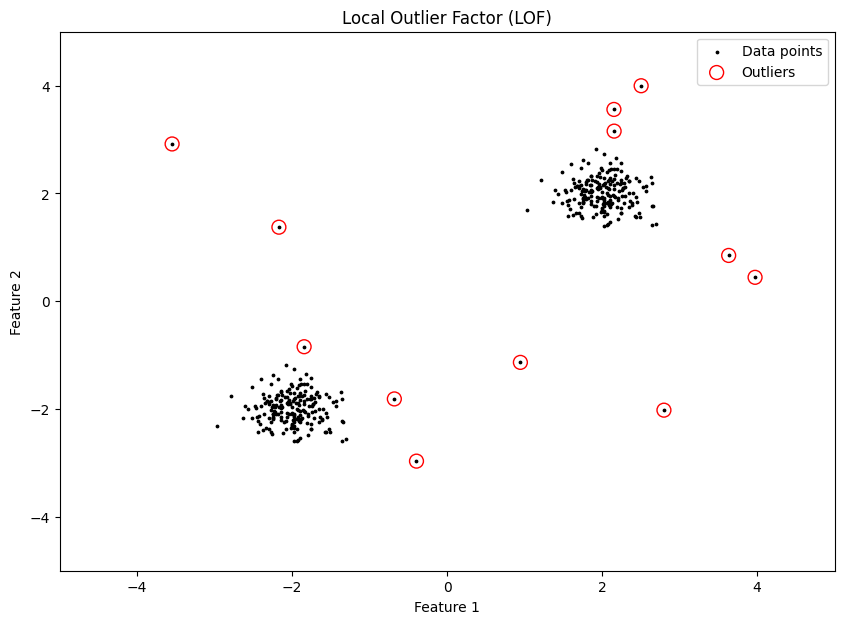

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate synthetic data
np.random.seed(42)
X = 0.3 * np.random.randn(200, 2)
X = np.r_[X + 2, X - 2]

# Add some outliers
outliers = np.random.uniform(low=-4, high=4, size=(10, 2))
X = np.vstack([X, outliers])

# Fit the model (Local Outlier Factor)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.03)  # Adjust parameters as needed
y_pred = clf.fit_predict(X)
scores = clf.negative_outlier_factor_

# Visualize the outliers
plt.figure(figsize=(10, 7))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3, label='Data points')
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], marker='o', edgecolors='r', facecolors='none', s=100, label='Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()


**Note** The Local Outlier Factor (LOF) algorithm is a powerful and widely used method for detecting outliers in datasets. However, like any algorithm, it has its limitations:

1. **Sensitivity to Parameters**:
   - The performance of the LOF algorithm can be sensitive to the choice of parameters, particularly the number of neighbors (`n_neighbors`) and the contamination parameter.
   - Selecting appropriate parameter values often requires domain knowledge and experimentation, which can be time-consuming.

2. **Scalability**:
   - The LOF algorithm can be computationally expensive, especially for large datasets. It requires computing distances between data points and their neighbors, which can be time-consuming for high-dimensional datasets or datasets with a large number of observations.
   - While there are optimizations and approximate methods available to improve scalability, the algorithm may still struggle with very large datasets.

3. **Curse of Dimensionality**:
   - Like many distance-based algorithms, LOF can suffer from the curse of dimensionality.
   - As the dimensionality of the data increases, the notion of distance becomes less meaningful, and the density estimation based on nearest neighbors becomes less accurate.

4. **Local Nature of Detection**:
   - LOF is designed to detect outliers based on local density variations. While this is effective in many cases, it may not capture global anomalies or outliers that are not locally isolated.
   - In datasets with varying densities or clusters of different sizes, LOF may struggle to accurately identify outliers.

5. **Assumption of Euclidean Distance**:
   - LOF relies on the Euclidean distance metric by default. While this is suitable for many datasets, it may not be appropriate for all types of data.
   - In cases where the data does not exhibit Euclidean geometry, or where the distances between points are not meaningful, LOF may produce suboptimal results.

6. **Noisy Data**:
   - LOF may be sensitive to noisy data or irrelevant features. Outliers can sometimes be incorrectly identified due to noise in the dataset or the presence of irrelevant features that contribute to the distance calculations.

7. **Interpretability**:
   - While LOF can identify outliers effectively, interpreting the output and understanding why specific points are flagged as outliers can be challenging, especially in high-dimensional datasets.
   - LOF provides outlier scores that indicate the degree of outlierness, but interpreting these scores may not always be straightforward.

Despite these limitations, LOF remains a valuable tool for outlier detection in various domains. It is often used in combination with other outlier detection techniques or preprocessing methods to improve its effectiveness and address its limitations.